<a href="https://colab.research.google.com/github/julianachavespalm/gestao_notas/blob/main/Projeto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto 1: Sistema de Gestão de Notas de Alunos

**Lidando com Arquivos, Pacotes e Módulos**

Objetivo: O objetivo deste projeto é desenvolver um sistema de gestão de notas de alunos em Python, que faça uso de manipulação de arquivos CSV, módulos e pacotes.

## Preparando o ambiente

In [55]:
# Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
caminho_diretorio = userdata.get('caminho_diretorio')

%cd $caminho_diretorio

/content/drive/MyDrive/Colab Notebooks/PretaLab/Ciclo11/gestao_notas


In [57]:
import os
print(os.getcwd())


/content/drive/MyDrive/Colab Notebooks/PretaLab/Ciclo11/gestao_notas


In [58]:
!ls

arquivos_csv  gestao_notas  main.py  Projeto1.ipynb  relatorios


## Cenário



1. Leitura e manipulação de arquivos CSV:

O sistema deve carregar os dados de notas de um arquivo CSV contendo as seguintes colunas:

 - Matrícula

- Nome do Aluno

- Disciplina

- Nota 1

- Nota 2

- Nota 3

- Nota Final

O arquivo de notas está em anexo como notas.csv

2. Divisão em Módulos:

- Módulo de manipulação de arquivos: Função que lê o arquivo CSV e retornam os dados.

- Módulo de análise de notas: Função que calcula a média final dos alunos e identifica se o aluno está aprovado (média ≥ 6) ou reprovado.

- Módulo de geração de relatórios: Função para gerar um arquivo CSV com as médias finais e o status de aprovação de cada aluno.

3. Relatórios:

O sistema deve gerar um arquivo CSV que contenha a média final de cada aluno e o status de aprovado ou reprovado.




**Estrutura do Projeto:**


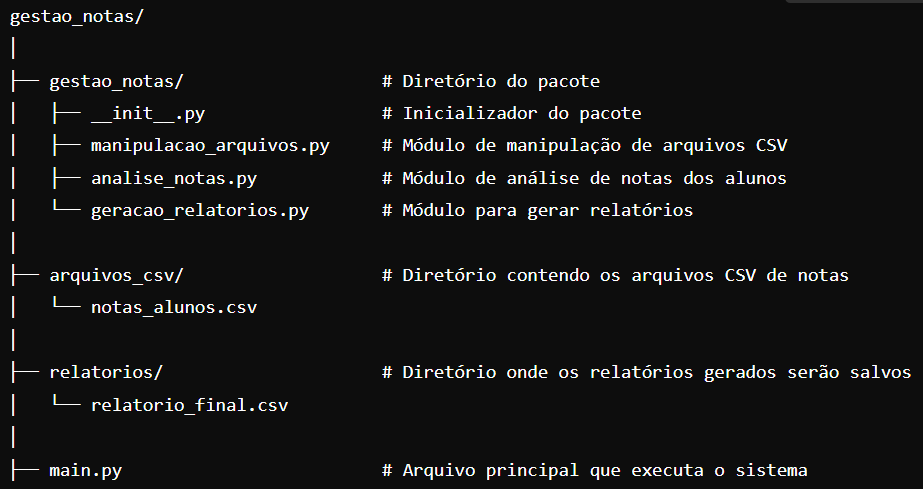

```
Funcionalidade: Configuração de diretórios
  Como sistema de gestão de notas
  Eu quero criar os diretórios necessários para armazenar arquivos e relatórios
  Para garantir que o sistema funcione corretamente ao manipular dados

  Cenário: Criação dos diretórios de trabalho
    Dado que o sistema precisa organizar arquivos CSV e relatórios
    Quando o sistema for inicializado
    Então os diretórios "gestao_notas", "arquivos_csv" e "relatorios" devem ser criados
    E se já existirem, nada deve ser alterado
```

In [ ]:
os.makedirs('gestao_notas', exist_ok=True)
os.makedirs('arquivos_csv', exist_ok=True)
os.makedirs('relatorios', exist_ok=True)

```
Funcionalidade: Criação de arquivos vazios
  Como sistema de gestão de notas
  Eu quero criar os arquivos principais necessários para a execução do sistema
  Para garantir que os módulos e o armazenamento de dados estejam prontos para uso

  Cenário: Criação dos arquivos vazios
    Dado que o sistema precisa de arquivos vazios para os módulos e dados
    Quando o sistema for inicializado
    Então os arquivos "__init__.py", "manipulacao_arquivos.py", "analise_notas.py", "geracao_relatorios.py" e "main.py" devem ser criados no diretório "gestao_notas"
    E o arquivo "notas_alunos.csv" deve ser criado no diretório "arquivos_csv"
    E se os arquivos já existirem, eles devem ser sobrescritos como vazios
```

In [ ]:
open('gestao_notas/__init__.py', 'w').close()
open('gestao_notas/manipulacao_arquivos.py', 'w').close()
open('gestao_notas/analise_notas.py', 'w').close()
open('gestao_notas/geracao_relatorios.py', 'w').close()
open('main.py', 'w').close()
open('arquivos_csv/notas_alunos.csv', 'w').close()

```
Funcionalidade: Inicialização do pacote "gestao_notas"
  Como sistema de gestão de notas
  Eu quero importar as funções principais de cada módulo
  Para facilitar o acesso às funcionalidades de manipulação de arquivos, análise de notas e geração de relatórios

  Cenário: Configuração do arquivo __init__.py
    Dado que o pacote "gestao_notas" contém múltiplos módulos
    Quando o arquivo "__init__.py" for criado
    Então ele deve importar as funções "ler_arquivo_csv", "escrever_arquivo_csv", "analisar_notas" e "gerar_relatorio"
    E essas funções devem estar disponíveis diretamente pelo pacote
```

In [43]:
%%writefile gestao_notas/__init__.py

from .manipulacao_arquivos import ler_arquivo_csv, escrever_arquivo_csv
from .analise_notas import analisar_notas
from .geracao_relatorios import gerar_relatorio



Overwriting gestao_notas/__init__.py




```
Funcionalidade: Manipulação de arquivos CSV
  Como sistema de gestão de notas
  Eu quero ler e escrever dados de alunos em arquivos CSV
  Para poder armazenar e processar as informações de forma eficiente

  Cenário: Leitura de arquivo CSV
    Dado que o sistema tem o caminho do arquivo CSV
    Quando o sistema ler o arquivo
    Então os dados devem ser carregados corretamente em uma lista
    E o cabeçalho deve ser ignorado

  Cenário: Escrita em arquivo CSV
    Dado que o sistema tem dados para salvar
    Quando o sistema escrever esses dados em um arquivo CSV
    Então o arquivo deve ser gerado com o cabeçalho correto
    E as linhas de dados devem ser salvas corretamente no arquivo

```



In [46]:
%%writefile gestao_notas/manipulacao_arquivos.py
import csv

# Função para ler um arquivo CSV
def ler_arquivo_csv(caminho_arquivo):
    with open(caminho_arquivo, newline='', encoding='utf-8') as csvfile:
        leitor_csv = csv.reader(csvfile, delimiter=';')
        next(leitor_csv)  # Pula o cabeçalho
        dados = list(leitor_csv)  # Lê todos os dados
    return dados

# Função para escrever em um arquivo CSV
def escrever_arquivo_csv(caminho_arquivo, cabecalho, dados):
    with open(caminho_arquivo, mode='w', newline='', encoding='utf-8') as csvfile:
        escritor_csv = csv.writer(csvfile, delimiter=';')
        escritor_csv.writerow(cabecalho)  # Escreve o cabeçalho
        escritor_csv.writerows(dados)     # Escreve os dados


Overwriting gestao_notas/manipulacao_arquivos.py




```
Funcionalidade: Análise das notas e cálculo da média
  Como sistema de gestão de notas
  Eu quero calcular a média das notas dos alunos
  Para saber se eles estão aprovados ou reprovados

  Cenário: Cálculo da média de três notas
    Dado que o aluno tem três notas
    Quando o sistema calcular a média dessas notas
    Então o sistema deve retornar a média correta

  Cenário: Análise das notas de alunos
    Dado um conjunto de notas de alunos
    Quando o sistema processar os dados e calcular a média
    Então o sistema deve atribuir o status de 'Aprovado' se a média for maior ou igual a 6
    E o sistema deve atribuir o status de 'Reprovado' se a média for menor que 6
    E as informações de cada disciplina devem ser adicionadas ao dicionário de resultados do aluno
```



In [70]:
%%writefile gestao_notas/analise_notas.py
# Função para calcular a média de três notas
def calcular_media(nota1, nota2, nota3):
    return (nota1 + nota2 + nota3) / 3

# Função que analisa as notas e calcula a média para cada aluno
def analisar_notas(dados):
    resultados = {}  # Dicionário para armazenar os resultados

    for row in dados:
        matricula = row[0]
        nome = row[1]
        disciplina = row[2]
        nota1 = float(row[3])
        nota2 = float(row[4])
        nota3 = float(row[5])

        # Calcula a média
        media = calcular_media(nota1, nota2, nota3)
        status = 'Aprovado' if media >= 6 else 'Reprovado'

        # Se a matrícula ainda não está no dicionário, inicializamos
        if matricula not in resultados:
            resultados[matricula] = {'nome': nome, 'disciplinas': []}

        # Adiciona a disciplina, notas, média e status ao dicionário
        resultados[matricula]['disciplinas'].append({
            'disciplina': disciplina,
            'nota1': f'{nota1:.1f}',
            'nota2': f'{nota2:.1f}',
            'nota3': f'{nota3:.1f}',
            'media': f'{media:.1f}',
            'status': status
        })

    return resultados

Overwriting gestao_notas/analise_notas.py


```
Funcionalidade: Geração de relatório final
  Como sistema de gestão de notas
  Eu quero gerar um relatório final com as médias e o status de aprovação dos alunos
  Para fornecer uma visão geral das notas de cada aluno em suas disciplinas

  Cenário: Gerar relatório final em CSV
    Dado que o sistema tenha processado os dados de notas dos alunos
    Quando o sistema gerar o relatório
    Então o relatório deve incluir a matrícula, nome, disciplina, média final e status de aprovação
    E o arquivo CSV "relatorio_final.csv" deve ser salvo no diretório "relatorios"

```



In [68]:
%%writefile gestao_notas/geracao_relatorios.py
import os
from gestao_notas.manipulacao_arquivos import ler_arquivo_csv, escrever_arquivo_csv
from gestao_notas.analise_notas import analisar_notas

def gerar_relatorio():
    # Caminho para o arquivo CSV de entrada e saída
    caminho_arquivo_csv = os.path.join('arquivos_csv', 'notas_alunos.csv')
    caminho_relatorio_csv = os.path.join('relatorios', 'relatorio_final.csv')

    # Lê o arquivo CSV de notas
    dados = ler_arquivo_csv(caminho_arquivo_csv)

    # Analisa as notas e calcula as médias
    resultados = analisar_notas(dados)

    # Preparando os dados para o relatório final
    linhas_relatorio = []
    for matricula, info in resultados.items():
        nome = info['nome']
        for disciplina_info in info['disciplinas']:
            disciplina = disciplina_info['disciplina']
            nota1 = disciplina_info['nota1']
            nota2 = disciplina_info['nota2']
            nota3 = disciplina_info['nota3']
            media = disciplina_info['media']
            status = disciplina_info['status']
            # Adiciona as informações à lista para o relatório
            linhas_relatorio.append([matricula, nome, disciplina, nota1, nota2, nota3, media, status])

    # Cabeçalho do relatório final
    cabecalho = ['Matrícula', 'Nome', 'Disciplina', 'Nota 1', 'Nota 2', 'Nota 3', 'Média Final', 'Status']

    # Gera o arquivo CSV com os resultados
    escrever_arquivo_csv(caminho_relatorio_csv, cabecalho, linhas_relatorio)

    print("Relatório gerado com sucesso!")

Overwriting gestao_notas/geracao_relatorios.py


```
Funcionalidade: Geração e leitura do relatório final
  Como sistema de gestão de notas
  Eu quero gerar o relatório final e exibi-lo no terminal
  Para visualizar as médias e o status de aprovação dos alunos logo após a geração

  Cenário: Geração e leitura do relatório final
    Dado que o sistema tenha processado os dados e gerado o relatório final
    Quando o relatório for gerado
    Então o relatório deve ser lido e exibido no terminal com as colunas: "Matrícula", "Nome", "Disciplina", "Média Final", "Status"

```



In [71]:
%%writefile main.py
import os
from gestao_notas.geracao_relatorios import gerar_relatorio
from gestao_notas.manipulacao_arquivos import ler_arquivo_csv

if __name__ == "__main__":
    # Chama a função principal que gera o relatório
    gerar_relatorio()

    # Caminho para o relatório gerado
    caminho_relatorio_csv = os.path.join('relatorios', 'relatorio_final.csv')

    # Lê o relatório final
    relatorio = ler_arquivo_csv(caminho_relatorio_csv)

    # Exibe o relatório no terminal
    print("\nRelatório Final:")
    # Exibe o cabeçalho formatado
    print(f"{'Matrícula':<12} {'Nome':<20} {'Disciplina':<15} {'Nota 1':<7} {'Nota 2':<7} {'Nota 3':<7} {'Média':<6} {'Status':<10}")

    # Exibe os dados formatados (sem o cabeçalho)
    for linha in relatorio[1:]:
        print(f"{linha[0]:<12} {linha[1]:<20} {linha[2]:<15} {linha[3]:<7} {linha[4]:<7} {linha[5]:<7} {linha[6]:<6} {linha[7]:<10}")


Overwriting main.py


In [72]:
!python main.py

Relatório gerado com sucesso!

Relatório Final:
Matrícula    Nome                 Disciplina      Nota 1  Nota 2  Nota 3  Média  Status    
100          Pedro Almeida        Física          2.3     1.9     5.6     3.3    Reprovado 
100          Pedro Almeida        Português       1.2     4.9     8.5     4.9    Reprovado 
100          Pedro Almeida        História        9.6     3.1     3.4     5.4    Reprovado 
100          Pedro Almeida        Geografia       3.6     3.5     0.2     2.4    Reprovado 
101          Fernanda Mendes      Matemática      2.3     2.9     0.8     2.0    Reprovado 
101          Fernanda Mendes      Física          2.4     9.8     0.3     4.2    Reprovado 
101          Fernanda Mendes      Português       4.3     0.8     1.9     2.3    Reprovado 
101          Fernanda Mendes      História        2.9     1.6     0.3     1.6    Reprovado 
101          Fernanda Mendes      Geografia       8.0     6.3     3.7     6.0    Aprovado  
102          Juliana Nunes      